In [45]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

In [46]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

### Feature Enginnering

In [47]:

# Features and number of clusters have alrerady been optimised

X_train_copy        = X_train.copy()
X_test_copy         = X_test.copy()
X_aim_copy          = X_aim.copy()

columns_k           = ['VehBCost', 
                       'VehicleAge', 
                       'VehOdo', 
                       'MMRAcquisitionAuctionAveragePrice'
                      ]

cluster_data        = X_train_copy[columns_k]

scaler              = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_data)  


kmeans              = KMeans(n_clusters = 8, random_state = 42, n_init=10).fit(scaled_cluster_data)

#---------------------------------------------
X_train_copy['TransactionCluster'] = kmeans.labels_
X_train_copy.TransactionCluster    = X_train_copy.TransactionCluster.astype('category')


X_test_copy_cluster_data          = scaler.transform(X_test_copy[columns_k])  
X_test_copy['TransactionCluster'] = kmeans.predict(X_test_copy_cluster_data)
X_test_copy.TransactionCluster    = X_test_copy.TransactionCluster.astype('category')
# ---------------
X_aim_copy_cluster_data     = scaler.transform(X_aim_copy[columns_k])  
X_aim_copy['TransactionCluster'] = kmeans.predict(X_aim_copy_cluster_data)
X_aim_copy.TransactionCluster    = X_aim_copy.TransactionCluster.astype('category')

# Adding the new categorical columns to the categorical list 
cat_cols_FE = cat_cols + ['TransactionCluster'] 


#### First RF Model

In [48]:

# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                              ])

rfc1                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 86,
                                                   max_depth         = 36,
                                                   min_samples_leaf  = 2,    
                                                   min_samples_split = 11,  
                                                 )

pipeline_rfc_1            = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc1)
                                       ])

pipeline_rfc_1.fit(X_train_copy, y_train)

pred_rfc_1                 = pipeline_rfc_1.predict(X_test_copy) 

f1_rfc_1          = f1_score(y_test       , pred_rfc_1)
recall_rfc_1      = recall_score(y_test   , pred_rfc_1)
precision_rfc_1   = precision_score(y_test, pred_rfc_1)
accuracy_rfc_1    = accuracy_score(y_test , pred_rfc_1)


rfc_1_metrics     = pd.DataFrame({
                                    'Model'    : ['RFC 1'],
                                    'F1 Score' : [f1_rfc_1],
                                    'Recall'   : [recall_rfc_1],
                                    'Precision': [precision_rfc_1],
                                    'Accuracy' : [accuracy_rfc_1]
                                    })

print('Scoring of RFC 1')
display(rfc_1_metrics.style.hide())
print('-- '*30)
#Confusion_Matrix_Func(y_test, pred_rfc_1, 'RFC 1')

Scoring of RFC 1


Model,F1 Score,Recall,Precision,Accuracy
RFC 1,0.434836,0.421986,0.448492,0.858580


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


In [49]:

# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                              ])

rfc2                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 86,
                                                   max_depth         = 36,
                                                   min_samples_leaf  = 1,    
                                                   min_samples_split = 10,  
                                                 )

pipeline_rfc_2            = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc2)
                                       ])

pipeline_rfc_2.fit(X_train_copy, y_train)

pred_rfc_2        = pipeline_rfc_2.predict(X_test_copy) 

f1_rfc_2          = f1_score(y_test       , pred_rfc_2)
recall_rfc_2      = recall_score(y_test   , pred_rfc_2)
precision_rfc_2   = precision_score(y_test, pred_rfc_2)
accuracy_rfc_2    = accuracy_score(y_test , pred_rfc_2)


rfc_2_metrics     = pd.DataFrame({
                                    'Model'    : ['RFC 2'],
                                    'F1 Score' : [f1_rfc_2],
                                    'Recall'   : [recall_rfc_2],
                                    'Precision': [precision_rfc_2],
                                    'Accuracy' : [accuracy_rfc_2]
                                    })

print('Scoring of RFC 2')
display(rfc_2_metrics.style.hide())
print('-- '*30)
#Confusion_Matrix_Func(y_test, pred_rfc_2, 'RFC 2')

Scoring of RFC 2


Model,F1 Score,Recall,Precision,Accuracy
RFC 2,0.410294,0.329787,0.542802,0.877781


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


In [55]:
# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                              ])

rfc3                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 86,
                                                   max_depth         = 36,
                                                   min_samples_leaf  = 5,    
                                                   min_samples_split = 11,  
                                                 )

pipeline_rfc_3            = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc3)
                                    ])

pipeline_rfc_3.fit(X_train_copy, y_train)

pred_rfc_3        = pipeline_rfc_3.predict(X_test_copy) 

f1_rfc_3          = f1_score(y_test       , pred_rfc_3)
recall_rfc_3      = recall_score(y_test   , pred_rfc_3)
precision_rfc_3   = precision_score(y_test, pred_rfc_3)
accuracy_rfc_3    = accuracy_score(y_test , pred_rfc_3)


rfc_3_metrics     = pd.DataFrame({
                                  'Model'    : ['RFC 3'],
                                  'F1 Score' : [f1_rfc_3],
                                  'Recall'   : [recall_rfc_3],
                                  'Precision': [precision_rfc_3],
                                  'Accuracy' : [accuracy_rfc_3]
                                   })

print('Scoring of RFC 3')
display(rfc_3_metrics.style.hide())
print('-- '*30)
#Confusion_Matrix_Func(y_test, pred_rfc_3, 'RFC 3')

Scoring of RFC 3


Model,F1 Score,Recall,Precision,Accuracy
RFC 3,0.418651,0.498818,0.360684,0.821396


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


### Ensemble Model

#### A combination of 3 RFCs with different scoring

In [56]:

# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

ensemble_hard = VotingClassifier(estimators=[
                                            ('rfc_1', pipeline_rfc_1),
                                            ('rfc_2', pipeline_rfc_2),
                                            ('rfc_3', pipeline_rfc_3)
                                            ], voting='hard'
                                 )

ensemble_hard.fit(X_train_copy, y_train)
predictions_hard = ensemble_hard.predict(X_test_copy)

f1_hard          = f1_score(y_test, predictions_hard)
recall_hard      = recall_score(y_test, predictions_hard)
accuracy_hard    = accuracy_score(y_test, predictions_hard)
precision_hard   = precision_score(y_test, predictions_hard)

print("Hard Voting Metrics:")
print("F1 Score  :", f1_hard)
print("Recall    :", recall_hard)
print("Precision :", precision_hard)
print("Accuracy  :", accuracy_hard)
# ---------------------------------------------------------------------------

# # Soft Voting
# ensemble_soft = VotingClassifier(estimators=[
#                                             ('rfc_1', pipeline_rfc_1),
#                                             ('rfc_2', pipeline_rfc_2),
#                                             ('rfc_3', pipeline_rfc_3)
#                                             ], voting='soft', weights=[1, 1, 1]
#                                  )

# ensemble_soft.fit(X_train_copy, y_train)
# predictions_soft = ensemble_soft.predict(X_test_copy)

# f1_soft         = f1_score(y_test, predictions_soft)
# recall_soft     = recall_score(y_test, predictions_soft)
# accuracy_soft   = accuracy_score(y_test, predictions_soft)
# precision_soft  = precision_score(y_test, predictions_soft)

# print("\nSoft Voting Metrics:")
# print("F1 Score  :", f1_soft)
# print("Recall    :", recall_soft)
# print("Precision :", precision_soft)
# print("Accuracy  :", accuracy_soft)

Hard Voting Metrics:
F1 Score  : 0.4364303178484108
Recall    : 0.4219858156028369
Precision : 0.4518987341772152
Accuracy  : 0.8594940566900335


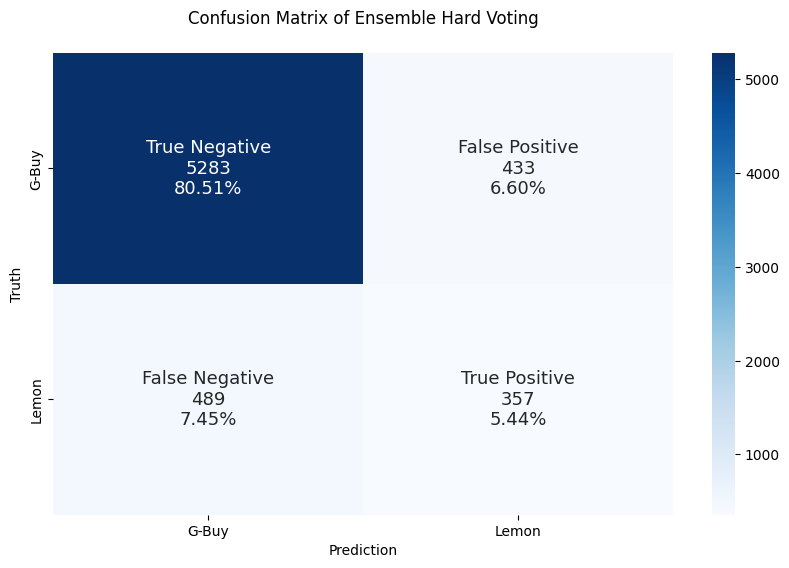

In [58]:
Confusion_Matrix_Func(y_test, predictions_hard, 'Ensemble Hard Voting')